In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
from scanpy import read_10x_h5
import os
import warnings
warnings.filterwarnings("ignore")
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


In [2]:
load_list=['151508','151675']
adata_list = []
MARKER_GENES = ['VIM','HPCAL1','CARTPT','RORB','PCP4','KRT17','MBP']
file_dir = '../spamc/data/'

### load adata and put adata into a list

In [3]:
from model import process_adata,integrate_datasets
for section_id in load_list:
    ### read adata
    input_dir = file_dir+section_id
    adata= sc.read_visium(path=input_dir, count_file=section_id + '_filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique(join="++")
    layer1=pd.read_csv(os.path.join(input_dir, 'metadata.tsv'),sep="\t",header=0)
    adata.obs['layer_guess_reordered'] = layer1.loc[:,'layer_guess_reordered']
    adata.obs_names = [x+'_'+section_id for x in adata.obs_names]
    processed = process_adata(
            adata,
            marker_genes=MARKER_GENES,
            min_genes=100,
            min_cells=50,
            n_top_genes=6000
        )
    print(f"Post-processed shape: {processed.shape}")
 
    adata_list.append(processed)


Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool', 'infomap', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}
Post-processed shape: (4382, 6000)
Post-processed shape: (3592, 6000)


### get a concated adata 

In [4]:
adata_list

[View of AnnData object with n_obs × n_vars = 4382 × 6000
     obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess_reordered', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
     var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'filter_bool', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'spatial', 'hvg', 'log1p'
     obsm: 'spatial',
 View of AnnData object with n_obs × n_vars = 3592 × 6000
     obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess_reordered', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_

In [5]:

# Integrate all samples
combined_adata = integrate_datasets(adata_list, load_list)
print("\nFinal combined dataset:", combined_adata)

Common genes across datasets: 3392
151508 aligned shape: (4379, 3392)
151675 aligned shape: (3566, 3392)

Final combined dataset: AnnData object with n_obs × n_vars = 7945 × 3392
    obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess_reordered', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'filter_bool', 'highly_variable'
    obsm: 'spatial'


### Start Training

In [ ]:
combined_adata.obs

,in_tissue,array_row,array_col,layer_guess_reordered,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,batch
AAACAAGTATCTCCCA-1_151508,1,50,102,Layer3,1847,7.521859,3627.0,8.196437,27.157430,34.298318,43.948167,61.648746,1847,151508
AAACAATCTACTAGCA-1_151508,1,3,43,Layer1,635,6.455199,956.0,6.863803,31.903766,42.364017,54.497908,85.878661,635,151508
AAACACCAATAACTGC-1_151508,1,59,19,WM,716,6.575076,990.0,6.898715,27.171717,37.272727,47.878788,78.181818,716,151508
AAACAGAGCGACTCCT-1_151508,1,14,94,Layer1,862,6.760415,1377.0,7.228388,32.171387,39.869281,51.924473,73.710966,862,151508
AAACAGCTTTCAGAAG-1_151508,1,43,9,Layer6,1720,7.450661,3215.0,8.075893,27.962675,34.930016,44.883359,62.052877,1720,151508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1_151675,1,31,77,Layer5,1920,7.560601,3519.0,8.166216,24.978687,31.543052,41.034385,58.851947,1920,151675
TTGTTTCACATCCAGG-1_151675,1,58,42,WM,1085,6.990257,1784.0,7.487174,28.755605,37.163677,48.374439,67.208520,1085,151675
TTGTTTCATTAGTCTA-1_151675,1,60,30,WM,1656,7.412764,2627.0,7.873979,20.289303,27.293491,37.152646,55.995432,1656,151675
TTGTTTCCATACAACT-1_151675,1,45,27,Layer6,1227,7.113142,1978.0,7.590347,28.513650,35.692619,45.803842,63.245703,1227,151675


In [7]:
result_filepath = f'./results/{load_list[0]}_{load_list[-1]}/'
result_filepath

'./results/151508_151675/'

In [8]:
from model import Tacos
tacos = Tacos(combined_adata,latent_dim=50,gpu=0,check_detect=True,path=result_filepath)

use device cuda:0 to train...
load nodecs, edge_weight saved
initial community finished!


In [9]:
#1 1 5 7 20 1
train_args = {
    'epoch': 1500,
    'base_w':1.0,
    'base':'csgcl',
    'spatial_w':1.5,
    'cross_w':1.0,
    'recon_w' :0.0,
    'lr':1e-3,
    'max_patience':100,
    'min_stop':500,
    'cpu':1,
    'k':50,
    'update_mnn':100,
    'save_inter':500,
    'csgcl_arg':{
        'ced_drop_rate_1' : 0.2,
        'ced_drop_rate_2' : 0.7,
        'cav_drop_rate_1' : 0.1,
        'cav_drop_rate_2' : 0.2,
        't0':5,
        'gamma':1
        },
    'cross_arg':{
        'alpha':1.0,
        # 'negative':True

    },
    'spatial_arg':{
        'regularization_acceleration':True,
        'edge_subset_sz':1000000
    }, 
    
}

In [10]:
path_str=tacos.train(train_args,result_filepath+'temp/')

start training embedding for epoch:1500
start mnn calculating
load agg
<class 'set'>
mnn calculated!
csgcl_loss: 16.356510, cross_loss: 0.407835, spatial_loss: 1.040745.
Epoch 10/1500, Loss: 18.325462, from min_epoch:0-------
csgcl_loss: 16.046505, cross_loss: 0.325929, spatial_loss: 0.947729.
Epoch 20/1500, Loss: 17.794029, from min_epoch:0-------
csgcl_loss: 15.966263, cross_loss: 0.265892, spatial_loss: 0.843189.
Epoch 30/1500, Loss: 17.496939, from min_epoch:0-------
csgcl_loss: 15.873264, cross_loss: 0.233037, spatial_loss: 0.817011.
Epoch 40/1500, Loss: 17.331816, from min_epoch:0-------
csgcl_loss: 15.799271, cross_loss: 0.198152, spatial_loss: 0.774253.
Epoch 50/1500, Loss: 17.158802, from min_epoch:0-------
csgcl_loss: 15.697092, cross_loss: 0.179775, spatial_loss: 0.757630.
Epoch 60/1500, Loss: 17.013311, from min_epoch:0-------
csgcl_loss: 15.685198, cross_loss: 0.153772, spatial_loss: 0.731960.
Epoch 70/1500, Loss: 16.936911, from min_epoch:0-------
csgcl_loss: 15.671484, c

In [11]:
path_str

'csgcl1.0spatial1.5cross1.0_recon0.0/5'

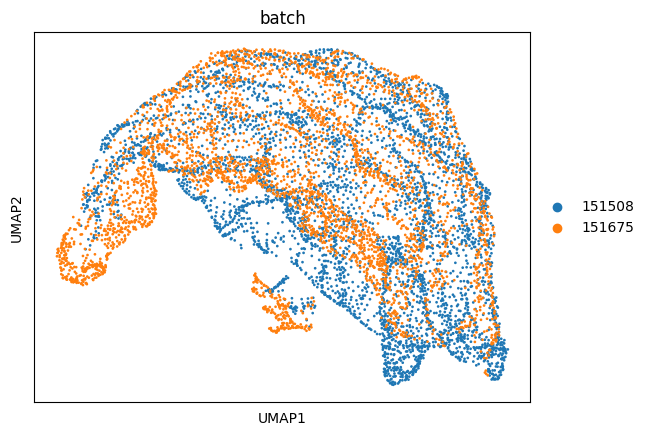

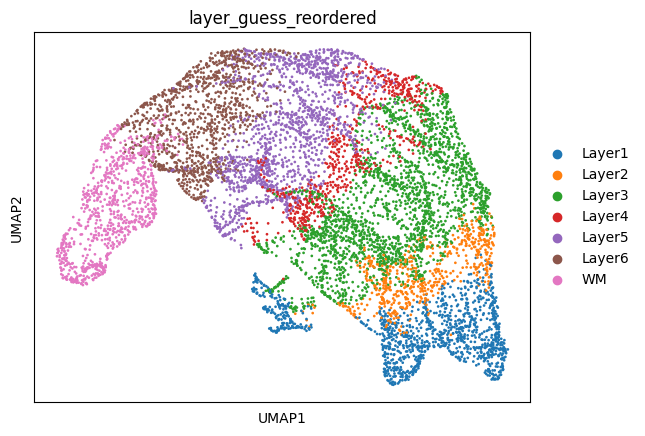

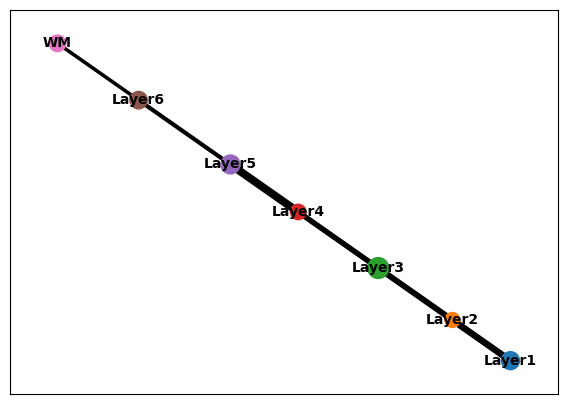

In [12]:
from model import visualize_embeddings,batch_entropy_mixing_score
adata_emb = visualize_embeddings(combined_adata, tacos.embedding,true_label_key='layer_guess_reordered')

In [14]:
adata_emb

AnnData object with n_obs × n_vars = 7945 × 3392
    obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess_reordered', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'batch'
    uns: 'neighbors', 'umap', 'batch_colors', 'layer_guess_reordered_colors', 'paga', 'layer_guess_reordered_sizes'
    obsm: 'spatial', 'tacos', 'X_umap'
    obsp: 'distances', 'connectivities'